In [15]:
import pandas as pd
import numpy as np

In [16]:
X_test = pd.read_csv('X_test.csv').drop(columns='Unnamed: 0',axis=1)
y_test = pd.read_csv('y_test.csv').drop(columns='Unnamed: 0',axis=1)

X_train = pd.read_csv('X_train.csv').drop(columns='Unnamed: 0',axis=1)
y_train = pd.read_csv('y_train.csv').drop(columns='Unnamed: 0',axis=1)

X_train_knn = np.ascontiguousarray(X_train)
X_test_knn = np.ascontiguousarray(X_test)

y_train = y_train.squeeze()


from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)


In [17]:
from sklearn.svm import SVC
# Using Radial Basis Function (RBF) kernel for non-linear problems
svm_model = SVC(kernel='rbf', probability=True)  # 'probability=True' to get probability estimates
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000,penalty='l2',C=0.01)  # Increasing max_iter for convergence
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)


In [19]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train)
knn_predictions = knn_model.predict(X_test_knn)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred, model_name='Model'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}\n")

# Example evaluations
evaluate_model(y_test, svm_predictions, 'SVM')
evaluate_model(y_test, logistic_predictions, 'Logistic Regression')
evaluate_model(y_test, xgb_predictions, 'XGBoost')
evaluate_model(y_test, knn_predictions, 'KNN')


SVM Performance:
Accuracy: 0.5712
Precision: 0.5669
Recall: 0.4949
F1-Score: 0.5284
AUC-ROC: 0.5691

Logistic Regression Performance:
Accuracy: 0.6102
Precision: 0.5977
Recall: 0.6029
F1-Score: 0.6003
AUC-ROC: 0.6100

XGBoost Performance:
Accuracy: 0.5571
Precision: 0.5435
Recall: 0.5474
F1-Score: 0.5455
AUC-ROC: 0.5568

KNN Performance:
Accuracy: 0.5259
Precision: 0.5115
Recall: 0.5197
F1-Score: 0.5156
AUC-ROC: 0.5257



In [22]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# import numpy as np

# param_distributions = {
#     'C': np.logspace(-3, 2, 6),
#     'gamma': np.logspace(-3, 2, 6),
#     'kernel': ['rbf']
# }

# svm_model = SVC()

# random_search = RandomizedSearchCV(svm_model, param_distributions, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
# random_search.fit(X_train, y_train)


# best_hyperparameters = random_search.best_params_
# print("Best Hyperparameters for the SVC model:")
# for param_name in best_hyperparameters:
#     print(f"{param_name}: {best_hyperparameters[param_name]}")

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Create KNN model
knn_model = KNeighborsClassifier()

# Set up Grid Search with parallelization
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_knn, y_train.ravel())  # Ensure y_train is 1D

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}


In [24]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define parameter grid
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet', 'none']
# }

# # Create Logistic Regression model with the 'saga' solver
# logistic_model = LogisticRegression(solver='saga', max_iter=10000)

# # Set up Grid Search with parallelization
# grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train.ravel())  # Ensure y_train is 1D for compatibility

# # Best parameters
# print("Best Hyperparameters:", grid_search.best_params_)


In [25]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Define parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'max_depth': [3, 4, 5, 6],
#     'n_estimators': [100, 200, 300]
# }

# # Create XGBoost model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # Set up Grid Search
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X_train, y_train)

# # Best parameters
# print(grid_search.best_params_)


In [26]:
coefficients = logistic_model.coef_[0]
feature_names = X_train.columns.tolist()
# Create a sorted list of features based on the absolute values of the coefficients
features_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the features and their coefficients
for feature, coef in features_importance:
    print(f"{feature}: {coef}")


sorted_features = sorted(features_importance, key=lambda x: abs(x[1]), reverse=True)

# Print sorted features with their coefficients
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")

reach_fighter1: 0.08224180201713704
reach_fighter2: -0.07821692162640048
sig_strikes_per_minute_fighter1: 0.07016709720943651
height_fighter1: -0.0643210437117762
height_fighter2: 0.04784663006402945
prev_trueskill_fighter2: -0.03290770106909645
prev_trueskill_fighter1: 0.02537033533369017
win/lose_streak_fighter1: -0.024915615587848328
num_fights_fighter2: -0.022664096432721905
sig_strikes_per_minute_fighter2: -0.02220849494550338
win/lose_streak_fighter2: 0.016835739401456804
L15_ER_average_fighter1: 0.013940700822397607
division_Featherweight: 0.013724902113529705
L15_ER_average_fighter2: -0.009564326866916644
total_win/loss_ratio_fighter1: 0.008357047916516659
finish_pcnt_fighter1: -0.00587422603241723
division_Middleweight: -0.005734627051914397
total_win/loss_ratio_fighter2: -0.00476708930619409
division_Light Heavyweight: -0.004726599931604095
num_fights_fighter1: -0.004705459642511216
division_Flyweight: 0.004520606259343797
division_Women's Strawweight: -0.004133981429185998
p

In [27]:
# Assuming logistic_model is already fitted
y_scores = logistic_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class


In [28]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


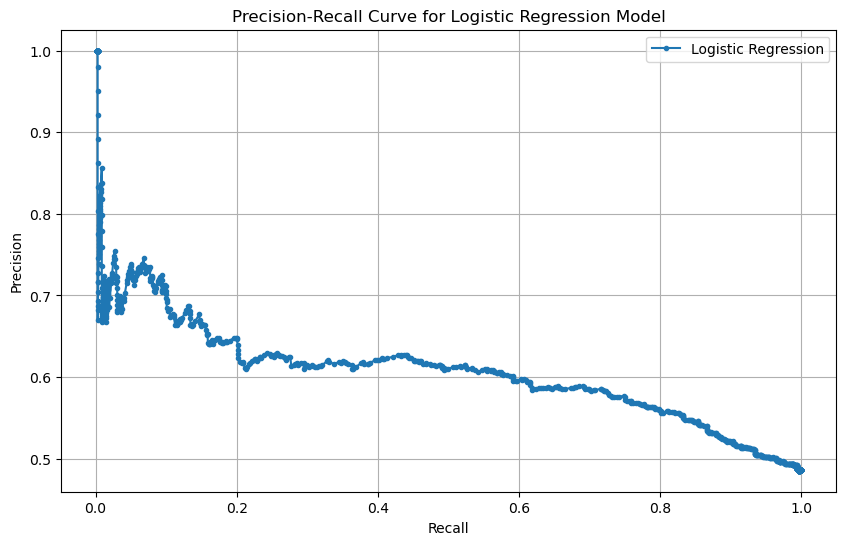

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


import numpy as np

# Assume y_scores contains model probability scores from logistic_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Interpolating for smoother curve (optional step for visual improvement)
# Generate new thresholds that are more finely spaced
new_thresholds = np.linspace(start=min(thresholds), stop=max(thresholds), num=1000)
new_precision = np.interp(new_thresholds, thresholds, precision[:-1])
new_recall = np.interp(new_thresholds, thresholds, recall[:-1])

plt.figure(figsize=(10, 6))
plt.plot(new_recall, new_precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming y_test are your true labels and logistic_model is your trained model
y_pred = logistic_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


              precision    recall  f1-score   support

           0       0.62      0.62      0.62       726
           1       0.60      0.60      0.60       685

    accuracy                           0.61      1411
   macro avg       0.61      0.61      0.61      1411
weighted avg       0.61      0.61      0.61      1411

Accuracy: 0.61


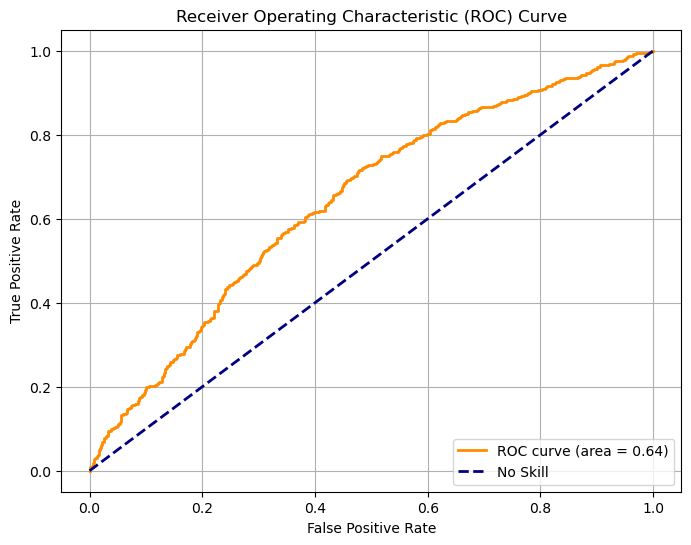

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming logistic_model is your trained model and you have test set X_test and true labels y_test

# Predict probabilities for the positive class
y_scores = logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [34]:
# Exporting information
import pickle

# Assuming fpr, tpr, and roc_auc are your ROC curve data
roc_data = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Saving data to a pickle file
with open('l2_log_reg_roc_data.pkl', 'wb') as file:
    pickle.dump(roc_data, file)


In [36]:
import pickle

# Loading ROC data for the "layer1" model
with open('roc_data_layer1_baseline.pkl', 'rb') as file:
    roc_data_layer1 = pickle.load(file)

# Extracting the ROC curve data
fpr_layer1_base = roc_data_layer1['fpr']
tpr_layer1_base = roc_data_layer1['tpr']
thresholds_layer1_base = roc_data_layer1['thresholds']
roc_auc_layer1_base = roc_data_layer1['roc_auc']


/var/folders/v5/23qsn2tj1pg_yz86qk9f46b40000gp/T/ipykernel_5118/1815922186.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = results_df.groupby('prob_bin').apply(lambda x: (x['actual'] == 1).mean())


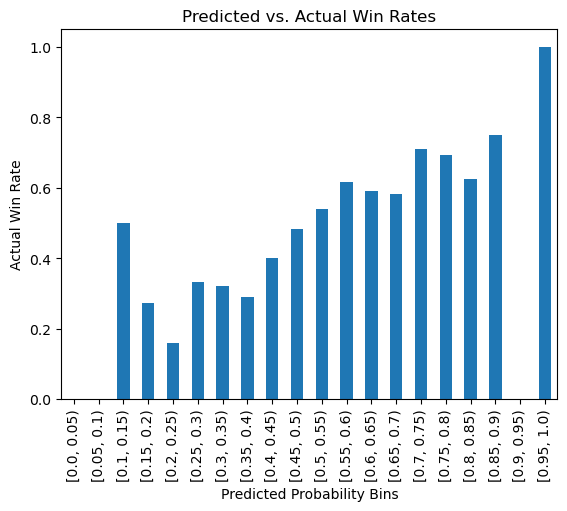

In [49]:
probabilities = logistic_model.predict_proba(X_test)[:, 1]
results_df = pd.DataFrame({'probabilities': probabilities, 'actual': y_test['result_fighter1']})

results_df['prob_bin'] = pd.cut(results_df['probabilities'], bins=np.arange(0, 1.05, 0.05), right=False)
summary = results_df.groupby('prob_bin').apply(lambda x: (x['actual'] == 1).mean())

# Plot the results
summary.plot(kind='bar')
plt.title('Predicted vs. Actual Win Rates')
plt.xlabel('Predicted Probability Bins')
plt.ylabel('Actual Win Rate')
plt.show()


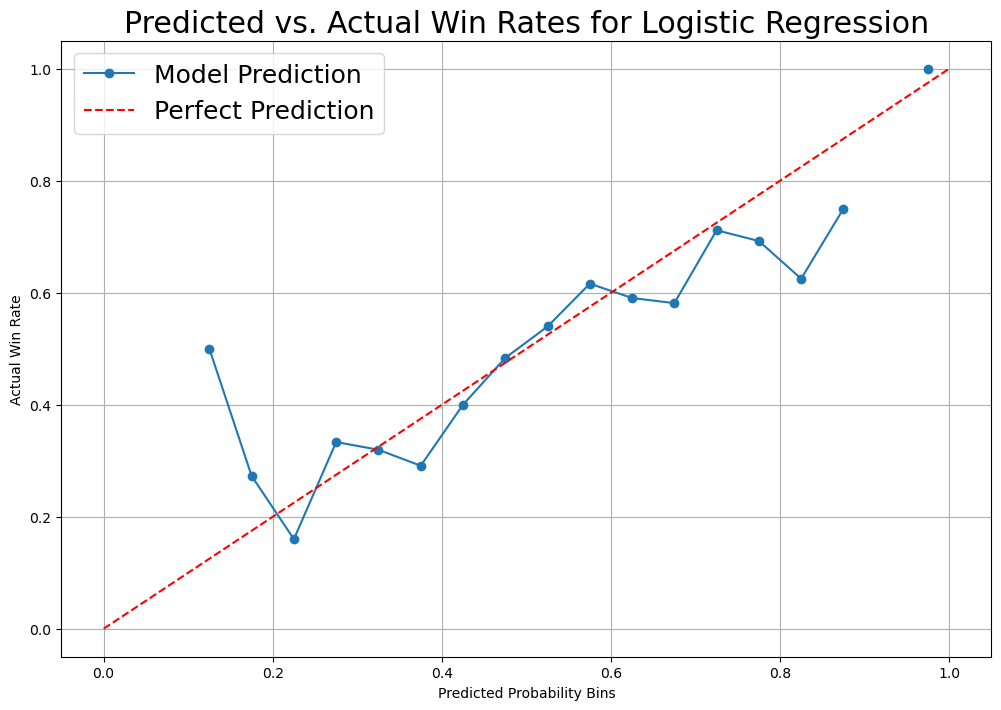

In [54]:
plt.figure(figsize=(12, 8))
plt.plot(summary.index.categories.mid, summary.values, 'o-', label='Model Prediction')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.rcParams.update({'font.size': 18})
plt.title('Predicted vs. Actual Win Rates for Logistic Regression')
plt.xlabel('Predicted Probability Bins')
plt.ylabel('Actual Win Rate')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
len(y_test)

1411